In [2]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.mlab import PCA as mlabPCA
import pandas as pd

# Actividad 1:
 Carga de datos

In [18]:
filename = "petrologydata.csv"
data = pd.read_csv(filename)

# ACTIVIDAD 2:
 Plotear las concentraciones de MgO versus SiO2
- ¿Están correlacionados o no están correlacionados?  

Text(0.5,1,'SiO2 vs MgO')

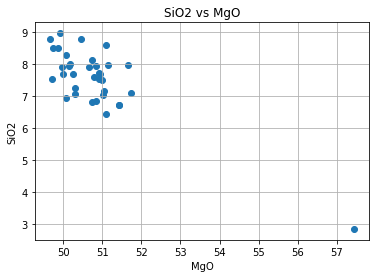

In [20]:
# MgO versus SiO2
y = data["MgO"]
x = data["SiO2"]

plt.scatter(x,y)
plt.grid(True)
plt.xlabel("MgO")
plt.ylabel("SiO2")
plt.title("SiO2 vs MgO")
# plt.savefig("svm.png")

Si estan correlacionadas como se puede ver en el grafico.

- ¿Qué es el coeficiente de correlación? 
Es una medida de la rrealcion lineal entre dos variables cuantitativas aleatorias.
Para este caso de MgO vs SiO2 es:

In [27]:
correlacion_mgo_sio2 = data.corr(method="pearson")["MgO"]["SiO2"]

### Correlacion entre MgO y SiO2

-0.8335655524716729
Hay un coheficiente de correlacion negativa.

# Actividad 3
### Calcule los componentes principales de los datos de óxido.  

- Calcular el promedio en cada columna de datos 

In [29]:
data.mean()

SiO2           50.806286
TiO2            1.552571
Al2O3          14.905143
Cr2O3           0.030571
FeO             9.658571
NiO             0.016000
MnO             0.402571
MgO             7.538000
CaO            11.385143
Na2O            2.869143
K2O             0.129714
Latitude       14.143851
Longitute    -105.505174
Elevation   -2787.314286
dtype: float64

- Calcule la matriz de covarianza 

In [139]:
data.cov()

,SiO2,TiO2,Al2O3,Cr2O3,FeO,NiO,MnO,MgO,CaO,Na2O,K2O,Latitude,Longitute,Elevation
SiO2,1.652436,0.120889,-0.493122,0.004726,0.529986,-0.003789,0.010822,-1.120275,-1.105451,0.301573,0.078799,-4.285229,2.003210,-92.150025
TiO2,0.120889,0.119131,-0.232996,0.001090,0.572877,0.000690,0.139870,-0.234604,-0.232719,0.051391,0.009651,-1.151290,0.349149,-48.879168
Al2O3,-0.493122,-0.232996,0.789961,-0.002629,-1.036537,-0.000708,-0.218228,0.694361,0.484737,-0.099795,-0.034828,3.987086,-1.965807,113.264899
Cr2O3,0.004726,0.001090,-0.002629,0.001129,0.010033,0.000146,-0.005299,-0.007011,-0.007365,0.005318,0.000447,-0.027159,0.002621,-0.552462
FeO,0.529986,0.572877,-1.036537,0.010033,4.075813,0.003291,0.494236,-1.215174,-1.207325,0.360137,0.063861,-2.829296,0.373077,-152.009580
NiO,-0.003789,0.000690,-0.000708,0.000146,0.003291,0.000519,0.001666,0.001698,0.001012,-0.000330,-0.000201,0.002563,-0.006864,0.198412
MnO,0.010822,0.139870,-0.218228,-0.005299,0.494236,0.001666,2.269426,-0.197615,-0.145505,-0.002815,0.011268,-2.072534,0.846768,-31.529462
MgO,-1.120275,-0.234604,0.694361,-0.007011,-1.215174,0.001698,-0.197615,1.093064,0.939737,-0.283405,-0.071483,3.923091,-1.663983,99.248176
CaO,-1.105451,-0.232719,0.484737,-0.007365,-1.207325,0.001012,-0.145505,0.939737,1.105573,-0.281398,-0.059596,3.842385,-1.492543,122.599017
Na2O,0.301573,0.051391,-0.099795,0.005318,0.360137,-0.000330,-0.002815,-0.283405,-0.281398,0.146802,0.022344,-0.122076,-0.172579,-1.804101


In [140]:
data.corr()

,SiO2,TiO2,Al2O3,Cr2O3,FeO,NiO,MnO,MgO,CaO,Na2O,K2O,Latitude,Longitute,Elevation
SiO2,1.000000,0.272466,-0.431607,0.109407,0.204218,-0.129399,0.005588,-0.833566,-0.817869,0.612300,0.730988,-0.419336,0.355535,-0.274148
TiO2,0.272466,1.000000,-0.759508,0.093955,0.822132,0.087766,0.269000,-0.650128,-0.641248,0.388601,0.333427,-0.419587,0.230789,-0.541580
Al2O3,-0.431607,-0.759508,1.000000,-0.088046,-0.577663,-0.034984,-0.162986,0.747239,0.518693,-0.293050,-0.467279,0.564292,-0.504610,0.487354
Cr2O3,0.109407,0.093955,-0.088046,1.000000,0.147901,0.191372,-0.104674,-0.199559,-0.208452,0.413079,0.158715,-0.101672,0.017799,-0.062877
FeO,0.204218,0.822132,-0.577663,0.147901,1.000000,0.071571,0.162506,-0.575716,-0.568753,0.465580,0.377210,-0.176288,0.042161,-0.287949
NiO,-0.129399,0.087766,-0.034984,0.191372,0.071571,1.000000,0.048566,0.071288,0.042270,-0.037813,-0.105322,0.014156,-0.068754,0.033313
MnO,0.005588,0.269000,-0.162986,-0.104674,0.162506,0.048566,1.000000,-0.125470,-0.091860,-0.004878,0.089198,-0.173059,0.128240,-0.080041
MgO,-0.833566,-0.650128,0.747239,-0.199559,-0.575716,0.071288,-0.125470,1.000000,0.854850,-0.707486,-0.815327,0.472016,-0.363115,0.363038
CaO,-0.817869,-0.641248,0.518693,-0.208452,-0.568753,0.042270,-0.091860,0.854850,1.000000,-0.698492,-0.675884,0.459683,-0.323855,0.445908
Na2O,0.612300,0.388601,-0.293050,0.413079,0.465580,-0.037813,-0.004878,-0.707486,-0.698492,1.000000,0.695415,-0.040079,-0.102764,-0.018007


- Realice la descomposición de valores propios y asegúrese de que los valores propios estén en orden descendente. 

In [88]:

# print(type(data.values))
# data.values
m_data = np.matrix(data.values)
# val_prop,vect_prop = np.linalg.eig(array_data)
m_data_t = m_data.T
m_cuadrada = m_data * m_data_t

val_prop, vect_prop = np.linalg.eig(np.matrix(data.cov()))

# val_prop

 
- Valores propios en orden descendente:


In [119]:
for i in val_prop:
    print(i)

68428.12927339505
29.476534301001642
5.28603319006876
2.3461037421592414
1.7887985935957857
0.9292657106355187
0.37695811038416754
0.10536646387161105
0.06234989200725892
0.02840510563781876
0.007271584666537113
0.0003879198161006095
0.0007557170778635347
0.0011629423959850216



- Calcule la fracción de la varianza explicada por cada componente principal 

In [141]:
sumatoria = np.sum(val_prop)
for i in val_prop:
    print( i/sumatoria)

0.9994098107822917
0.00043051209906063494
7.720382664807902e-05
3.426542741887617e-05
2.6125847410068984e-05
1.3572156332407616e-05
5.505566757008604e-06
1.5389033550807362e-06
9.106356469911326e-07
4.148636175237495e-07
1.0620329874335471e-07
5.665665189513609e-09
1.1037435478835924e-08
1.698506231667482e-08


- Haga un gráfico de la varianza porcentual acumulada contabilizada frente al índice del componente. 

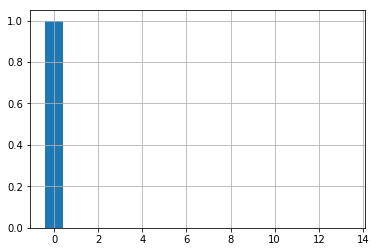

In [147]:
# crear la instancia de PCA
pca = PCA()
# ajuste en los datos
pca.fit(data.values)

kk = pca.fit_transform(data.values)
# acceso a valores y vectores
# print('PCA componentes')
# print(pca.components_)
# print('PCA varianza')
# print(pca.explained_variance_)

# plt.imshow(pca.inverse_transform(kk), cmap=plt.cm.Greys_r)

# a = pca.get_covariance()
# a.shape


pca = PCA()
pca.fit(data.values)
varianza = pca.explained_variance_ratio_
var_acum= np.cumsum(varianza)
plt.bar(range(len(varianza)), varianza, )
plt.grid(True)
plt.show()


In [133]:
# print(1.651/3.448)

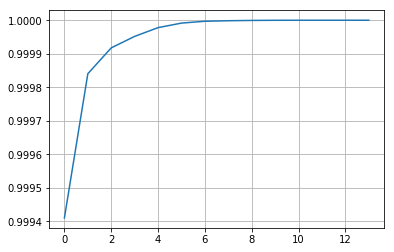

In [143]:
plt.plot(range(len(varianza)), var_acum)
plt.grid(True)
plt.show()